In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fnmatch import fnmatch
import pandas as pd
import numpy as np
import time

sns.set(style='white')


color_names = ["black",
               "windows blue",
               "red",
               "amber",
               "faded green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish",
               "mint",
               "light cyan",
               "steel blue",
               "forest green",
               "pastel purple",
               "salmon",
               "dark brown"]

colors = sns.xkcd_palette(color_names)

In [2]:
# accumulate fit random seed in the /src director
pattern = "*.csv"
outfilenames = []
for path, subdirs, files in os.walk('./amazon_out/'):
    for name in files:
        if fnmatch(name, pattern):
            outfilenames.append(os.path.join(path, name)) 


dataframes = [pd.read_csv(df) for df in outfilenames]
if len(dataframes) > 0:
    amazondf_concat = pd.concat(dataframes)
    amazondf_concat.to_csv('amazon_agg_'+str(int(time.time()*1e6))+'.csv')


In [3]:
# accumulate fit random seed in the /src director
pattern = "*.csv"
outfilenames = []
for path, subdirs, files in os.walk('./tripadvisor_out/'):
    for name in files:
        if fnmatch(name, pattern):
            outfilenames.append(os.path.join(path, name)) 


dataframes = [pd.read_csv(df) for df in outfilenames]
if len(dataframes) > 0:
    tripadvisordf_concat = pd.concat(dataframes)
    tripadvisordf_concat.to_csv('tripadvisor_agg_'+str(int(time.time()*1e6))+'.csv')



In [4]:
# accumulate fit random seed in the /src director
pattern = "*.csv"
outfilenames = []
for path, subdirs, files in os.walk('./yelp_out/'):
    for name in files:
        if fnmatch(name, pattern):
            outfilenames.append(os.path.join(path, name)) 


dataframes = [pd.read_csv(df) for df in outfilenames]
if len(dataframes) > 0:
    yelpdf_concat = pd.concat(dataframes)
    yelpdf_concat.to_csv('yelp_agg_'+str(int(time.time()*1e6))+'.csv')




In [5]:
# amazondf_concat = pd.read_csv("amazon_agg_1630375637698619.csv")
# tripadvisordf_concat = pd.read_csv("tripadvisor_agg_1630375960126714.csv")
# yelpdf_concat = pd.read_csv("yelp_agg_1630376299964837.csv")

In [6]:
amazonreviewstestct_res = amazondf_concat
amazonreviewstestct_res = \
amazonreviewstestct_res.rename(columns={\
                                        'causalrep_testctaccs_100.0.2001': "causalrep_testaccs", \
                                        'naive_testctaccs_1000.0': "naive_testaccs"})
# print(list(amazonreviewstestct_res.columns))
amazonreviewstestct_res = amazonreviewstestct_res[[
'causalrep_testaccs', \
'naive_testaccs']].stack().reset_index().set_index('level_0').rename(columns={'level_1':'method',0:'acc'})
amazonreviewstestct_res['data'] = 'amazon'


In [7]:
tripadvisorreviewstestct_res = tripadvisordf_concat
tripadvisorreviewstestct_res = \
tripadvisorreviewstestct_res.rename(columns={\
                                        'causalrep_testctaccs_100.0.2001': "causalrep_testaccs", \
                                        'naive_testctaccs_1000.0': "naive_testaccs"})
# print(list(tripadvisorreviewstestct_res.columns))
tripadvisorreviewstestct_res = tripadvisorreviewstestct_res[[
'causalrep_testaccs', \
'naive_testaccs']].stack().reset_index().set_index('level_0').rename(columns={'level_1':'method',0:'acc'})
tripadvisorreviewstestct_res['data'] = 'tripadvisor'



In [8]:
yelpreviewstestct_res = yelpdf_concat
yelpreviewstestct_res = \
yelpreviewstestct_res.rename(columns={\
                                        'causalrep_testctaccs_100.0.2001': "causalrep_testaccs", \
                                        'naive_testctaccs_1000.0': "naive_testaccs"})
# print(list(yelpreviewstestct_res.columns))
yelpreviewstestct_res = yelpreviewstestct_res[[
'causalrep_testaccs', \
'naive_testaccs']].stack().reset_index().set_index('level_0').rename(columns={'level_1':'method',0:'acc'})
yelpreviewstestct_res['data'] = 'yelp'




In [9]:

reviewstestct_res = pd.concat([amazonreviewstestct_res, \
                             tripadvisorreviewstestct_res, \
                             yelpreviewstestct_res])
reviewstestct_res['testset'] = 'testct'


In [10]:
amazonreviewstestobs_res = amazondf_concat
amazonreviewstestobs_res = \
amazonreviewstestobs_res.rename(columns={\
                                        'causalrep_testobsaccs_100.0.2001': "causalrep_testaccs", \
                                        'naive_testobsaccs_1000.0': "naive_testaccs"})
# print(list(amazonreviewstestobs_res.columns))
amazonreviewstestobs_res = amazonreviewstestobs_res[[
'causalrep_testaccs', \
'naive_testaccs']].stack().reset_index().set_index('level_0').rename(columns={'level_1':'method',0:'acc'})
amazonreviewstestobs_res['data'] = 'amazon'

tripadvisorreviewstestobs_res = tripadvisordf_concat
tripadvisorreviewstestobs_res = \
tripadvisorreviewstestobs_res.rename(columns={\
                                        'causalrep_testobsaccs_100.0.2001': "causalrep_testaccs", \
                                        'naive_testobsaccs_1000.0': "naive_testaccs"})
# print(list(tripadvisorreviewstestobs_res.columns))
tripadvisorreviewstestobs_res = tripadvisorreviewstestobs_res[[
'causalrep_testaccs', \
'naive_testaccs']].stack().reset_index().set_index('level_0').rename(columns={'level_1':'method',0:'acc'})
tripadvisorreviewstestobs_res['data'] = 'tripadvisor'


yelpreviewstestobs_res = yelpdf_concat
yelpreviewstestobs_res = \
yelpreviewstestobs_res.rename(columns={\
                                        'causalrep_testobsaccs_100.0.2001': "causalrep_testaccs", \
                                        'naive_testobsaccs_1000.0': "naive_testaccs"})
# print(list(yelpreviewstestobs_res.columns))
yelpreviewstestobs_res = yelpreviewstestobs_res[[
'causalrep_testaccs', \
'naive_testaccs']].stack().reset_index().set_index('level_0').rename(columns={'level_1':'method',0:'acc'})
yelpreviewstestobs_res['data'] = 'yelp'




reviewstestobs_res = pd.concat([amazonreviewstestobs_res, \
                             tripadvisorreviewstestobs_res, \
                             yelpreviewstestobs_res])
reviewstestobs_res['testset'] = 'testobs'



In [11]:
reviews_res = pd.concat([reviewstestobs_res, reviewstestct_res])

In [12]:
reviews_res

,method,acc,data,testset
level_0,,,,
0,causalrep_testaccs,0.5770,amazon,testobs
0,naive_testaccs,0.9745,amazon,testobs
1,causalrep_testaccs,0.5690,amazon,testobs
1,naive_testaccs,0.9665,amazon,testobs
2,causalrep_testaccs,0.5635,amazon,testobs
...,...,...,...,...
90,naive_testaccs,0.0260,yelp,testct
91,causalrep_testaccs,0.5630,yelp,testct
91,naive_testaccs,0.0255,yelp,testct


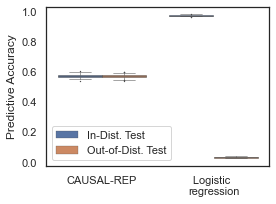

In [13]:
plt.figure(figsize=(4,3))
g = sns.boxplot(x="method", y="acc", data=reviews_res[reviews_res['data']=='amazon'], \
                hue="testset", \
                linewidth=0.5, fliersize=0.5)
g.set(xticklabels=['CAUSAL-REP', 'Logistic \nregression'])
# g.set(ylim=(-1,1))
g.get_legend().set_title('')
for t, l in zip(g.get_legend().texts, ['In-Dist. Test', 'Out-of-Dist. Test']): t.set_text(l)
g.set(xlabel='')
g.set(ylabel='Predictive Accuracy')
plt.tight_layout()
plt.savefig('amazon_boxplot.pdf')

/Users/yixinwang/py3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yixinwang/py3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


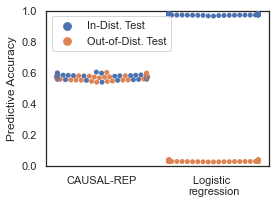

In [14]:
plt.figure(figsize=(4,3))
g = sns.swarmplot(x="method", y="acc", data=reviews_res[reviews_res['data']=='amazon'], \
                hue="testset")
g.set(xticklabels=['CAUSAL-REP', 'Logistic \nregression'])
g.set(ylim=(0,1))
plt.legend(loc='upper left')
g.get_legend().set_title('')
for t, l in zip(g.get_legend().texts, ['In-Dist. Test', 'Out-of-Dist. Test']): t.set_text(l)
g.set(xlabel='')
g.set(ylabel='Predictive Accuracy')
plt.tight_layout()
plt.savefig('amazon_swarmplot.pdf')

/Users/yixinwang/py3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yixinwang/py3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


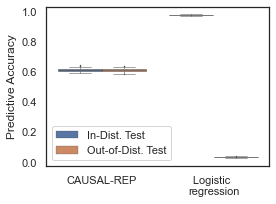

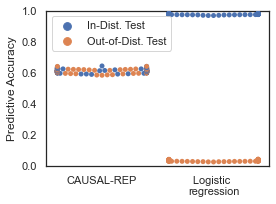

In [15]:
plt.figure(figsize=(4,3))
g = sns.boxplot(x="method", y="acc", data=reviews_res[reviews_res['data']=='tripadvisor'], \
                hue="testset", \
                linewidth=0.5, fliersize=0.5)
g.set(xticklabels=['CAUSAL-REP', 'Logistic \nregression'])
# g.set(ylim=(-1,1))
g.get_legend().set_title('')
for t, l in zip(g.get_legend().texts, ['In-Dist. Test', 'Out-of-Dist. Test']): t.set_text(l)
g.set(xlabel='')
g.set(ylabel='Predictive Accuracy')
plt.tight_layout()
plt.savefig('tripadvisor_boxplot.pdf')

plt.figure(figsize=(4,3))
g = sns.swarmplot(x="method", y="acc", data=reviews_res[reviews_res['data']=='tripadvisor'], \
                hue="testset")
g.set(xticklabels=['CAUSAL-REP', 'Logistic \nregression'])
g.set(ylim=(0,1))
plt.legend(loc='upper left')
g.get_legend().set_title('')
for t, l in zip(g.get_legend().texts, ['In-Dist. Test', 'Out-of-Dist. Test']): t.set_text(l)
g.set(xlabel='')
g.set(ylabel='Predictive Accuracy')
plt.tight_layout()
plt.savefig('tripadvisor_swarmplot.pdf')

/Users/yixinwang/py3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yixinwang/py3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


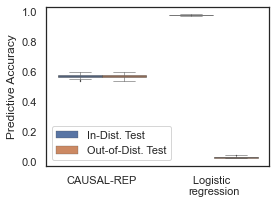

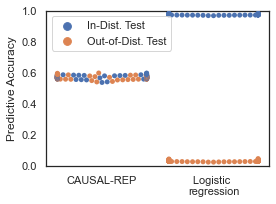

In [16]:
plt.figure(figsize=(4,3))
g = sns.boxplot(x="method", y="acc", data=reviews_res[reviews_res['data']=='yelp'], \
                hue="testset", \
                linewidth=0.5, fliersize=0.5)
g.set(xticklabels=['CAUSAL-REP', 'Logistic \nregression'])
# g.set(ylim=(-1,1))
g.get_legend().set_title('')
for t, l in zip(g.get_legend().texts, ['In-Dist. Test', 'Out-of-Dist. Test']): t.set_text(l)
g.set(xlabel='')
g.set(ylabel='Predictive Accuracy')
plt.tight_layout()
plt.savefig('yelp_boxplot.pdf')

plt.figure(figsize=(4,3))
g = sns.swarmplot(x="method", y="acc", data=reviews_res[reviews_res['data']=='yelp'], \
                hue="testset")
g.set(xticklabels=['CAUSAL-REP', 'Logistic \nregression'])
g.set(ylim=(0,1))
plt.legend(loc='upper left')
g.get_legend().set_title('')
for t, l in zip(g.get_legend().texts, ['In-Dist. Test', 'Out-of-Dist. Test']): t.set_text(l)
g.set(xlabel='')
g.set(ylabel='Predictive Accuracy')
plt.tight_layout()
plt.savefig('yelp_swarmplot.pdf')